<div class="alert alert-block alert-success">
    <h1 align="center">5 Steps to do when conducting your Exploratory Data Analysis (EDA)</h1>
    <h4 align="center"><a href="https://mohammadamirifard.com/">Mohammad Amirifard</a></h5>
</div>

<img src = "https://miro.medium.com/proxy/1*Owa2rsDG6Rwv1IM_RdsL3A.gif">

### Detail:
In this program you learn how to do eda on your data

EDA: Every time before we start analysing data in any method either manual or using computing tools, we always need to check and understand the data that we have. This intends to find out whether the data is sufficient or ready enough to proceed to the analytical process. As we already know, data is not always clean and ready to use. There are a lot of data in this world that is still messy, inconsistent, having many missing and duplicate values, imbalanced data, and many more.So, some of you might already deal with these issues and understand enough that data is not always clean like Kaggle Dataset, especially real-world data. Thus, Exploratory Data Analysis (EDA) needs to be done beforehand

<div class="alert alert-block alert-success">
    <h1 align="center">Let's get started</h1>
    <h2 align="center">Step1: Import libararies and load dataset</h2>
</div> 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

filepath = r'googleplaystore.csv'
data = pd.read_csv(filepath)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<div class="alert alert-block alert-success">
    <h2 align="center">Step2: Gather useful information of the data</h2>
</div> 

In [2]:
rows, columns = data.shape
data.info()
print(f'\nThe number of rows is    :{rows}\nThe number of columns is :{columns}')
print(f'\nThe title of columns : \n{data.columns}')
print(f'\nIndex list:\n{data.index}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB

The number of rows is    :10841
The number of columns is :13

The title of columns : 
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
 

In [3]:
# Find unique items in each column
data.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

<div class="alert alert-block alert-success">
    <h2 align="center">Step3: Change the type of each column to a good type like int,flaot,...</h2>
</div> 

In [4]:
# Change type of column "Reviews" from object to int32
# When you run this code : data.Reviews = data.Reviews.astype('int32') , you understand that the code is intteruped beacuse of
# 3.0M item. So to solve this item, firstly we check that which index includes this item. So :
for i, item in enumerate(data.Reviews):
   try:
      int(item)
   except ValueError:
      print('The index ,including error, is {} with a value of {!r}'.format(i, item))


The index ,including error, is 10472 with a value of '3.0M'


In [5]:
# Now we must check this row to solve the error.
# After checking it, you undestand that this row must be shifted one step to the right. So:
data.iloc[10472] = data.iloc[10472].shift(periods=1)

In [6]:
# Now we can change the type of it:
data.Reviews = data.Reviews.astype('int32')

In [7]:
# Change type of columns ["App","Type","Content Rating","Category","Genres", "Current Ver", "Android Ver"] from objects
# to categories
for i in ["App","Type","Content Rating","Category","Genres", "Current Ver", "Android Ver"]:
    data[i] = data[i].astype('category')

In [8]:
# Change type of column "Rating" from obeject to float16 (for minimizing the useage of memory)
data.Rating = data.Rating.astype('float16')

In [9]:
# Change type of column "Size" from object to float.In this column I try to remove letters 'M' and "k" . Because I want to 
# consider Megabyte for all. So it is needed to multiply items including 'k' by 0.0009765625(1 kB = 0.0009765625 MB)
# So we define a function to do this stage together

# Our function:
def items_to_float_values(x):
    if type(x) == float or type(x) == int:
        return x
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 0.0009765625
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', ''))
    return None

data.Size = data.Size.apply(items_to_float_values)

# So far we have turned items to float numbers and eliminated 'M' and 'k' form items.
# Take a look at it:
data.rename(columns ={'Size':'Size(MB)'}, inplace=True)
print('Type of column "Size(MB)" has changed to :',data['Size(MB)'].dtype)
data.iloc[0:5,[4]]

Type of column "Size(MB)" has changed to : float64


,Size(MB)
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [10]:
# Change type of column "Installs" from object to int64. But firstly we must remove string '+' from items. Then remove comma
# form items and finally change the type:

data= data.replace(to_replace={'Installs':'[+]'},value={'Installs':''},regex=True)
data.Installs = data.Installs.str.replace(',', '').astype('int64')

In [11]:
# Change type of column 'Price' from obejct flaot16. But first, we must remove $ from items
data.Price = data.Price.str.replace('$', '', regex=True).astype('float16')

In [12]:
# Change type of column "Last Updated" from object to time
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

In [13]:
# So far, we have successfully changed all old types to new ones. Therefor, take a look at the information of data again

In [14]:
data.info()
print('\nCongratulations. You have successfully changed the types')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  category      
 1   Category        10841 non-null  category      
 2   Rating          9367 non-null   float16       
 3   Reviews         10841 non-null  int32         
 4   Size(MB)        9146 non-null   float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  category      
 7   Price           10841 non-null  float16       
 8   Content Rating  10841 non-null  category      
 9   Genres          10840 non-null  category      
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  category      
 12  Android Ver     10839 non-null  category      
dtypes: category(7), datetime64[ns](1), float16(2), float64(1), int32(1), int64(1)
memory usage: 862.3 KB

Cong

<div class="alert alert-block alert-success">
    <h2 align="center">Step4: Fill or drop missing values </h2>
</div> 

In [15]:
# At the begining we check the number of missed values in each column
data.isnull().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Size(MB)          1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
# Now we must chech all missing values and fill or drop them, if it is necessary
# Start with column "App". We must find where the value has been missed. S:
index_of_null_values_in_App_column= np.where(data.App.isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "App" column.')
data.iloc[index_of_null_values_in_App_column]


In the below row(s) you can see the Nan value(s). Focus on "App" column.


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,NaN,Life Made WI-Fi Touchscreen Photo Frame,1.900391,19,3.0,1000,Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up


In [17]:
# Wow. There is  actually a NaN value in column "APP". So we must decide to how to  fill it.
# There are many ways to be used. Finally and based on your work and data, you must to  decide which is appropriate for you.
# So in this program I invented to use my own stratgies. 
# And now, I decided to drop this column, since in this big data one row colud be dropped without any problem
data.drop([10472], axis=0, inplace=True)

In [18]:
# It is the turn of column "Rating" to be checked for missin data.
index_of_null_values_in_Rating_column = np.where(data.Rating.isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "Rating" column .')
data.iloc[index_of_null_values_in_Rating_column]


In the below row(s) you can see the Nan value(s). Focus on "Rating" column .


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7,50000,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,100000,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,10000,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82.0,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up


In [19]:
# Wow. There are 1474, including NaN items for "Rating" column
# What do I have to do with these NaN values?--->As I said before, I try to use different methods to fill missed datas. So, now
# I try to use the method interpolate linear.So:
data.Rating.interpolate(method='linear', inplace=True)

# Chceck the performance of our code
print(f'\n Congratulations. We can see that value:{[data.iloc[113,2]]} has been replaced with the old value:[NaN] in the index [113]')
data.iloc[112:115]


 Congratulations. We can see that value:[4.15] has been replaced with the old value:[NaN] in the index [113]


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
112,Selfie Camera Photo Editor & Filter & Sticker,BEAUTY,4.101562,187,30.0,50000,Free,0.0,Teen,Beauty,2018-07-24,3.0.1,4.0.3 and up
113,Wrinkles and rejuvenation,BEAUTY,4.148438,182,5.7,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
114,Eyes Makeup Beauty Tips,BEAUTY,4.199219,30,2.9,10000,Free,0.0,Everyone,Beauty,2018-04-09,3.3.9,4.0.3 and up


In [20]:
# It is column "Size(MB)" turn to be checked for missed values
index_of_null_values_in_Size_column = np.where(data['Size(MB)'].isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "Size" column .')
data.iloc[index_of_null_values_in_Size_column]


In the below row(s) you can see the Nan value(s). Focus on "Size" column .


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.101562,36639,NaN,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.398438,295221,NaN,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.601562,17057,NaN,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.300781,40211,NaN,5000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.900391,356,NaN,100000,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.398438,3471,NaN,100000,Free,0.0,Everyone,Weather,2018-07-24,Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.599609,8,NaN,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.400391,622,NaN,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.000000,88486,NaN,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device


In [21]:
# I decided to fill the missed vlaues in this column with interpolat and method index
data['Size(MB)'].interpolate(method='index', inplace=True)
# Chceck the performance of our code
print(f'\n Congratulations. We can see that value:{[data.iloc[37,4]]} has been replaced with the old value:[NaN] in the index [37]')
data.iloc[36:39]


 Congratulations. We can see that value:[17.5] has been replaced with the old value:[NaN] in the index [37]


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.699219,8145,24.0,500000,Free,0.0,Everyone,Art & Design;Creativity,2018-08-02,1.0.9,4.4 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.101562,36639,17.5,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
38,PIP Camera - PIP Collage Maker,ART_AND_DESIGN,4.699219,158,11.0,10000,Free,0.0,Everyone,Art & Design,2017-11-29,1.3,4.0.3 and up


In [22]:
# It is the turn of "Type" column to be checked
index_of_null_values_in_Type_column = np.where(data.Type.isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "Type" column .')
data.iloc[index_of_null_values_in_Type_column]



In the below row(s) you can see the Nan value(s). Focus on "Type" column .


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.449219,0,41.0,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


In [23]:
# I decided to fill the missed vlaue in this column with data.fillna and method 'ffill'
data.Type.fillna(method='ffill', inplace=True)
# Chceck the performance of our code
print(f'\n Congratulations. We can see that value:{[data.iloc[9148,6]]} has been replaced with the old value:[NaN] in the index [9148]')
data.iloc[9147:9150]


 Congratulations. We can see that value:['Free'] has been replaced with the old value:[NaN] in the index [9148]


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9147,Plants vs. Zombies™ 2,FAMILY,4.398438,567632,15.0,10000000,Free,0.0,Everyone 10+,Casual,2018-06-12,6.8.1,4.1 and up
9148,Command & Conquer: Rivals,FAMILY,4.449219,0,41.0,0,Free,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device
9149,Star Wars™: Galaxy of Heroes,FAMILY,4.500000,1461698,67.0,10000000,Free,0.0,Everyone 10+,Role Playing,2018-05-21,0.12.334385,4.1 and up


In [24]:
# It is the turn of "Current Ver" column to be checked
index_of_null_values_in_CurrentVer_column = np.where(data['Current Ver'].isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "Current Ver" column .')
data.iloc[index_of_null_values_in_CurrentVer_column]


In the below row(s) you can see the Nan value(s). Focus on "Current Ver" column .


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.199219,55,2.700000,5000,Free,0.000000,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.101562,20145,0.010742,1000000,Free,0.000000,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.199219,4010,8.700000,500000,Free,0.000000,Everyone,Tools,2017-05-10,NaN,4.0 and up
6803,BT Master,FAMILY,4.449219,0,0.216797,100,Free,0.000000,Everyone,Education,2016-11-06,NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14.000000,50000,Paid,0.990234,Everyone,Puzzle,2018-04-18,NaN,4.0 and up
7407,Calculate My IQ,FAMILY,3.648438,44,7.200000,10000,Free,0.000000,Everyone,Entertainment,2017-04-03,NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.351562,1,0.231445,10,Paid,0.990234,Everyone,Tools,2016-07-04,NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,3.400391,8,0.642578,1000,Free,0.000000,Everyone,Books & Reference,2017-01-31,NaN,3.0 and up


In [25]:
# I decided to fill the missed vlaue in this column with data.fillna and method 'bfill'
data['Current Ver'].fillna(method='bfill', inplace=True)
# Chceck the performance of our code
print(f'\n Congratulations. We can see that value:{[data.iloc[15,11]]} has been replaced with the old value:[NaN] in the index [15]')
data.iloc[14:17]


 Congratulations. We can see that value:['3.1'] has been replaced with the old value:[NaN] in the index [15]


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
14,3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.398438,1518,37.0,100000,Free,0.0,Everyone,Art & Design,2018-08-03,1.2.3,2.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.199219,55,2.7,5000,Free,0.0,Everyone,Art & Design,2018-06-06,3.1,4.2 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.699219,3632,5.5,500000,Free,0.0,Everyone,Art & Design,2018-07-31,3.1,4.1 and up


In [26]:
# It is the turn of "Android Ver" column to be checked
index_of_null_values_in_AndroidVer_column = np.where(data['Android Ver'].isnull())[0]
print('\nIn the below row(s) you can see the Nan value(s). Focus on "Android Ver" column .')
data.iloc[index_of_null_values_in_AndroidVer_column]


In the below row(s) you can see the Nan value(s). Focus on "Android Ver" column .


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.398438,230,11.0,1000,Paid,1.490234,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.500000,189,2.1,10000,Free,0.000000,Everyone,Personalization,2018-03-27,1.1,NaN


In [27]:
# I decided to fill the missed vlaues in this column with data.fillna and method 'bfill'
data['Android Ver'].fillna(method='bfill', inplace=True)
# Chceck the performance of our code
print(f'\n Congratulations. We can see that value:{[data.iloc[4453,12]]} has been replaced with the old value:[NaN] in the index [4453]')
data.iloc[4452:4455]


 Congratulations. We can see that value:['4.0 and up'] has been replaced with the old value:[NaN] in the index [4453]


,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4452,P-Home for KLWP,PERSONALIZATION,5.000000,4,12.0,100,Paid,0.990234,Everyone,Personalization,2018-05-15,v2018.May.15.14,5.0 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.398438,230,11.0,1000,Paid,1.490234,Everyone,Personalization,2018-07-20,4.4,4.0 and up
4454,"Super P Launcher for Android P 9.0 launcher, t...",TOOLS,4.398438,2026,7.5,100000,Free,0.000000,Everyone,Tools,2018-08-03,1.9,4.0 and up


In [28]:
# Again, we check the number of missed values in each column
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size(MB)          0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  category      
 1   Category        10840 non-null  category      
 2   Rating          10840 non-null  float16       
 3   Reviews         10840 non-null  int32         
 4   Size(MB)        10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  category      
 7   Price           10840 non-null  float16       
 8   Content Rating  10840 non-null  category      
 9   Genres          10840 non-null  category      
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  category      
 12  Android Ver     10840 non-null  category      
dtypes: category(7), datetime64[ns](1), float16(2), float64(1), int32(1), int64(1)
memory usage: 946.8 KB


<div class="alert alert-block alert-success">
    <h2 align="center">Step 5: Well down. Now you have a clean data.So it's time to analyze & visualize the data </h2>
</div> 

<img src = "https://cdn.dribbble.com/users/72535/screenshots/2630779/data_visualization_by_jardson_almeida.gif">

In [30]:
# In this part you can extract what you need. So it not mandatory to copy my code. You can just learn the methods to work with
# them better and better.So, Let's get started

In [31]:
#This code shows the number of unique items in each column
data.nunique()

App               9659
Category            33
Rating             293
Reviews           6001
Size(MB)          1280
Installs            20
Type                 2
Price               91
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [32]:
# The describe() method is used for calculating some statistical data like percentile,mean and std of the numerical values
# of the Series or DataFrame
data.describe()

,Rating,Reviews,Size(MB),Installs,Price
count,10840.000000,1.084000e+04,10840.000000,1.084000e+04,1.084000e+04
mean,4.191406,4.441529e+05,21.906151,1.546434e+07,1.027344e+00
std,0.517578,2.927761e+06,21.965827,8.502936e+07,inf
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,5.400000,1.000000e+03,0.000000e+00
50%,4.300781,2.094000e+03,14.000000,1.000000e+05,0.000000e+00
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000e+00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,4.000000e+02


In [33]:
# Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors
# unless an array of values and an aggregation function are passed
pd.crosstab(data['Content Rating'], data.Type)

Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,8019,695
Everyone 10+,381,33
Mature 17+,479,20
Teen,1156,52
Unrated,2,0


In [34]:
print('The number of installs for Paid applications :',data[data.Type=='Paid']['Installs'].sum())
print('The number of installs for Free applications :',data[data.Type=='Free']['Installs'].sum())

The number of installs for Paid applications : 72956081
The number of installs for Free applications : 167560477406


In [35]:
#This table shows information of the most popular app, recognized by the number of reviews
data[data.Reviews ==data.Reviews.max()]

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.101562,78158306,20.5,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [36]:
# This table show information of the most expensive apps, recognized by it's price
data[data.Price ==data.Price.max()]

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.300781,6,1.500000,100,Paid,400.0,Everyone,Entertainment,2018-07-16,1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.800781,718,26.000000,10000,Paid,400.0,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.599609,275,7.300000,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.800781,3547,1.800000,100000,Paid,400.0,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.000000,856,8.700000,10000,Paid,400.0,Everyone,Entertainment,2018-05-19,3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.101562,1867,4.700000,50000,Paid,400.0,Everyone,Finance,2017-11-12,1.6,4.0 and up
5358,I am Rich!,FINANCE,3.800781,93,22.000000,1000,Paid,400.0,Everyone,Finance,2017-12-11,1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.500000,472,0.942383,5000,Paid,400.0,Everyone,Finance,2017-05-01,3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.398438,201,2.700000,5000,Paid,400.0,Everyone,Entertainment,2017-05-30,1.54,1.6 and up
5364,I am rich (Most expensive app),FINANCE,4.101562,129,2.700000,1000,Paid,400.0,Teen,Finance,2017-12-06,2,4.0.3 and up


This plot shwos that most of the people registered a rate between 3.5 to 5.It is noteworthy that people in "Everone" group were more interested in reginstering their views


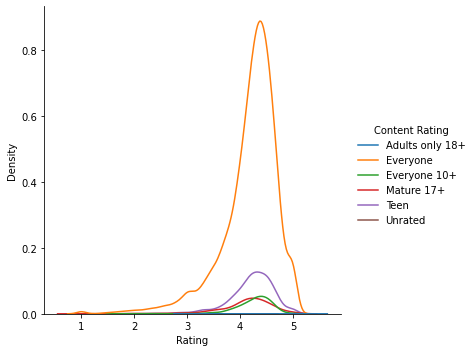

In [37]:
sns.displot(data, x="Rating", hue='Content Rating',kind="kde")
print(f'This plot shwos that most of the people registered a rate between 3.5 to 5.It is noteworthy that people'
      ,f'in "Everone" group were more interested in reginstering their views')

This shows that most of the applications have sizes less than 20MB


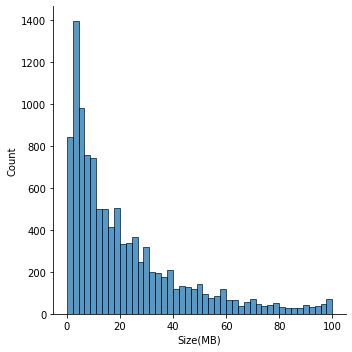

In [38]:
sns.displot(data, x="Size(MB)")
print('This shows that most of the applications have sizes less than 20MB')

This plot shows that the number of reviews falls down sharply when the price changed from free 0 to paid >0


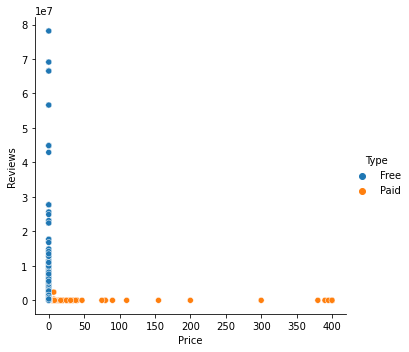

In [39]:
sns.relplot(x="Price", y="Reviews",hue='Type', data=data)
print('This plot shows that the number of reviews falls down sharply when the price changed from free 0 to paid >0')